<a href="https://colab.research.google.com/github/DrakeData/Digit_Recognizer/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: Digit Recognizer

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import metrics
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical, plot_model
from keras import  backend as K
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt # plotting library

%matplotlib inline

## Ingest
Donwloading the data from Kaggle's API

In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp './drive/MyDrive/Colab Notebooks/API Keys/kaggle.json' ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle competitions download digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 46.9MB/s]
100% 9.16M/9.16M [00:00<00:00, 55.4MB/s]
 99% 6.00M/6.09M [00:00<00:00, 56.1MB/s]
100% 6.09M/6.09M [00:00<00:00, 49.1MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 172MB/s]


In [7]:
! unzip test.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                


In [8]:
! unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


## EDA

In [9]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,...,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,...,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [12]:
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

To improve the model’s accuracy, we will want to normalize the data. This will also help us from exploding gradients due to the high numeric pixel values (which is in a range from 0 to 255). We will divide the values by 255.

In [13]:
x = train_df.drop('label', axis=1)
y = train_df['label']

# Scale Data
x_s = x/255

In [14]:
# split data into 80% train & 20% test set
x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, 
                                                    random_state=0)

In [15]:
y_train.value_counts()

1    3723
7    3502
3    3488
9    3376
0    3319
2    3317
6    3296
8    3295
4    3245
5    3039
Name: label, dtype: int64

## Models

### Random Forest Classifier

In [16]:
r_forest = RandomForestClassifier()

# number of trees used
print(f'Number of Trees used : {r_forest.n_estimators}')

Number of Trees used : 100


In [17]:
start = datetime.now()

# Fit the model
r_forest.fit(x_train, y_train)
end = datetime.now()
print(f"Total elapsed time = {end-start}")

# Predict
rf_pred = r_forest.predict(x_test)

Total elapsed time = 0:00:29.165299


In [18]:
# Check accuracy
acc = accuracy_score(y_test, rf_pred)
print(f'Accuracy score = {acc}')
print(f'Classification Report {classification_report(y_test, rf_pred)}')

Accuracy score = 0.9644047619047619
Classification Report               precision    recall  f1-score   support

           0       0.97      0.98      0.97       813
           1       0.99      0.99      0.99       961
           2       0.96      0.97      0.97       860
           3       0.96      0.95      0.95       863
           4       0.97      0.96      0.97       827
           5       0.96      0.97      0.96       756
           6       0.97      0.99      0.98       841
           7       0.97      0.96      0.97       899
           8       0.94      0.95      0.95       768
           9       0.95      0.93      0.94       812

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



In [19]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
holdout_df = test_df

# Standardize the data
ss_holdout = holdout_df/255

# predict ImageId
predict = r_forest.predict(ss_holdout)

result = pd.Series(predict,name="Label")

submit = pd.concat([pd.Series(range(1,28001), name="ImageId"), result], axis = 1)

#export to csv
submit.to_csv('./drive/MyDrive/Colab Notebooks/Digit_Recognizer/rf_submission.csv', index=False)

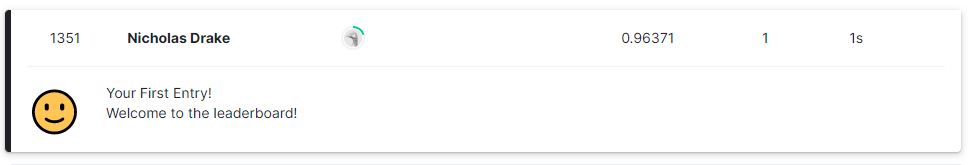

The Random Forest Classifier had a high accuracy score of .96 and good precision, recall, and F-1 scores. It takes about 23 seconds to run.

### Principal Components Analysis (PCA)

In [21]:
pca = PCA()

start = datetime.now()
xproj = pca.fit(x_s)
end = datetime.now()
print(f"Total elapsed time = {end-start}")
print(pca.components_.shape)
print(f"Principal components count: {pca.n_components_}")

Total elapsed time = 0:00:08.455974
(784, 784)
Principal components count: 784


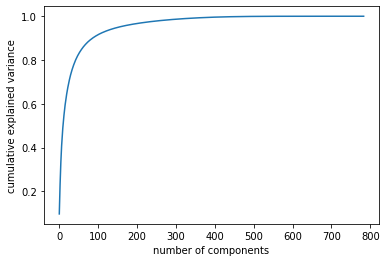

In [22]:
#Explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [23]:
pca2 = PCA(.95)

start = datetime.now()
pca2.fit(x_train)
end = datetime.now()
print(f"Total elapsed time = {end-start}")

x_train_pca = pca2.transform(x_train)
x_test_pca = pca2.transform(x_test)

Total elapsed time = 0:00:06.601399


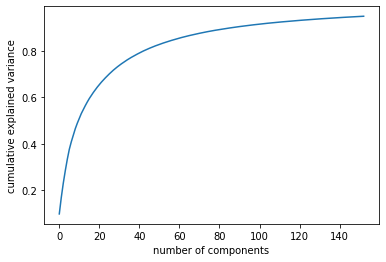

In [24]:
#Explained variance plot
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Random Forest Using PCA

In [25]:
start = datetime.now()
r_forest2 = RandomForestClassifier()
r_forest2.fit(x_train_pca, y_train)
end = datetime.now()
print(f"Total elapsed time = {end-start}")

# Predict
rf_pred2 = r_forest2.predict(x_test_pca)

Total elapsed time = 0:00:56.706449


In [26]:
# Check accuracy
acc2 = accuracy_score(y_test, rf_pred2)
print(f'Accuracy score = {acc2}')
print(f'Classification Report {classification_report(y_test, rf_pred2)}')

Accuracy score = 0.9408333333333333
Classification Report               precision    recall  f1-score   support

           0       0.96      0.97      0.96       813
           1       0.98      0.98      0.98       961
           2       0.93      0.95      0.94       860
           3       0.90      0.92      0.91       863
           4       0.95      0.94      0.94       827
           5       0.92      0.92      0.92       756
           6       0.95      0.98      0.96       841
           7       0.95      0.96      0.95       899
           8       0.92      0.89      0.90       768
           9       0.94      0.90      0.92       812

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [27]:
holdout_df2 = test_df

# Standardize the data
ss_holdout = holdout_df2/255

x_test_pca = pca2.transform(ss_holdout)

# predict ImageId
predict2 = r_forest2.predict(x_test_pca)

result2 = pd.Series(predict,name="Label")

submit2 = pd.concat([pd.Series(range(1,28001),name ="ImageId"), result2], axis=1)

#export to csv
submit2.to_csv('./drive/MyDrive/Colab Notebooks/Digit_Recognizer/rf2_submission.csv', index=False)

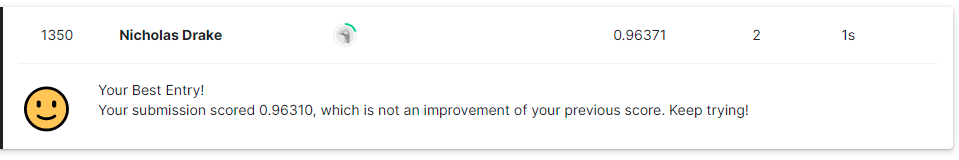

Using the Random Forest Classifier with PCA took about 2x as long compared to just using the Random Forest. It was close in performance with the accuracy score of .94, which is .02 lower than the previous model.

### K-Means Clustering
K-Means clustering looks at partition n observations into k clusters to identify which cluster each observation belongs in. We will be using Mini Batch K-Means which is similar to K-Means, but preforms better as the computationally costly step is conducted on only a random sample of observations instead of all observations.

In [28]:
total_clusters = len(np.unique(y_test))

# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters=total_clusters)
# Fitting the model to training set
kmeans.fit(x_train)
kmeans.labels_

array([1, 1, 3, ..., 3, 4, 3], dtype=int32)

The below function associates most probable label with each cluster in KMeans model and returns the dictionary of clusters assigned to each label

In [29]:
def retrieve_info(cluster_labels, y_train):
  # Initializing
  reference_labels = {}
  
  # For loop to run through each label of cluster label
  for i in range(len(np.unique(kmeans.labels_))):
    index = np.where(cluster_labels == i,1,0)
    num = np.bincount(y_train[index==1]).argmax()
    reference_labels[i] = num
  return reference_labels

In [30]:
reference_labels = retrieve_info(kmeans.labels_, y_train)
number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

predicted 'number_label' and the actual label for the first 10 training examples

In [31]:
# Comparing Predicted values and Actual values
print(number_labels[:10].astype(int))
print(y_train[:10])

[2 2 9 9 2 2 5 1 3 3]
39317    6
32837    6
16644    4
20005    4
1533     2
41842    2
7781     3
28433    1
5554     3
31233    3
Name: label, dtype: int64


Check accuracy score

In [32]:
acc4 = accuracy_score(number_labels, y_train)
print(f'Accuracy score = {acc4}')

Accuracy score = 0.5705059523809524


The accuracy score is low compared to our previous models, in which we would want to analyze. One issue that can be causing this is that I used the wrong cluster (k) value. I will try looping through different cluster amounts and look at the different Inertia, Homogeneity, and Accuracy scores.
-	**Inertia**: measures internal coherent clusters. The higher the number of clusters, the lower this score will be.
-	**Homogeneity**: measures the data points of a specific cluster belonging to a specific class. The closer to 1, the closer the cluster labeling is given a ground truth.
-	**Accuracy**: measures the accuracy classification score of the model. The closer to 1, the more accurate the model is.


In [33]:
# Function to calculate metrics for the model
def calculate_metrics(model, output):
  print(f'Number of clusters is {model.n_clusters}')
  print(f'Inertia : {model.inertia_}')
  print(f'Homogeneity : {metrics.homogeneity_score(output,model.labels_)}')

In [34]:
cluster_number = [10,16,36,64,144,256]

for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  # Initialize the K-Means model
  
  kmeans = MiniBatchKMeans(n_clusters=i)
  # Fitting the model to training set
  kmeans.fit(x_train)
  # Calculating the metrics
  calculate_metrics(kmeans, y_train)
  # Calculating reference_labels
  reference_labels = retrieve_info(kmeans.labels_, y_train)
  # ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))
  
  for i in range(len(kmeans.labels_)):
    number_labels[i] = reference_labels[kmeans.labels_[i]]
  print('Accuracy score : {}'.format(accuracy_score(number_labels, y_train)))
  print('\n')

Number of clusters is 10
Inertia : 1347187.064342475
Homogeneity : 0.4786317683873965
Accuracy score : 0.5605059523809524


Number of clusters is 16
Inertia : 1236620.2005890158
Homogeneity : 0.56401823232733
Accuracy score : 0.6650297619047619


Number of clusters is 36
Inertia : 1093890.8262856437
Homogeneity : 0.6823767853744503
Accuracy score : 0.7554166666666666


Number of clusters is 64
Inertia : 1011983.9581391332
Homogeneity : 0.7467422531833169
Accuracy score : 0.8207738095238095


Number of clusters is 144
Inertia : 909446.512075921
Homogeneity : 0.8064125682248062
Accuracy score : 0.8660416666666667


Number of clusters is 256
Inertia : 842196.8581522554
Homogeneity : 0.8406170726932929
Accuracy score : 0.8927380952380952




As the number of clusters increased: the inertial score decreased, homogeneity score increased, and accuracy score increased. 

For our next model, I will be running the number of clusters as 256.

In [35]:
kmeans2 = MiniBatchKMeans(n_clusters=256)
# Fitting the model to testing set
kmeans2.fit(x_train)
# Calculating the metrics
calculate_metrics(kmeans2, y_train)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans2.labels_, y_train)
# 'number_labels' is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans2.labels_))

for i in range(len(kmeans2.labels_)): 
 number_labels[i] = reference_labels[kmeans2.labels_[i]]
 
print(f'Accuracy score : {accuracy_score(number_labels, y_train)}')
print('\n')

Number of clusters is 256
Inertia : 841744.6228463612
Homogeneity : 0.8469331291248516
Accuracy score : 0.8985416666666667




In [36]:
holdout_df3 = test_df

# Standardize the data
ss_holdout = holdout_df3/255

# predict ImageId
predict3 = kmeans2.predict(ss_holdout)

reference_labels = retrieve_info(kmeans2.labels_, y_train)
number_labels = np.random.rand(len(predict3))

for i in range(len(predict3)):
  number_labels[i] = reference_labels[kmeans2.labels_[i]]

result3 = pd.Series(number_labels.astype(int), name="Label")
submit3 = pd.concat([pd.Series(range(1,len(number_labels)+1), name ="ImageId"), result3], axis=1)

#export to csv
submit3.to_csv('./drive/MyDrive/Colab Notebooks/Digit_Recognizer/km_submission.csv', index=False)

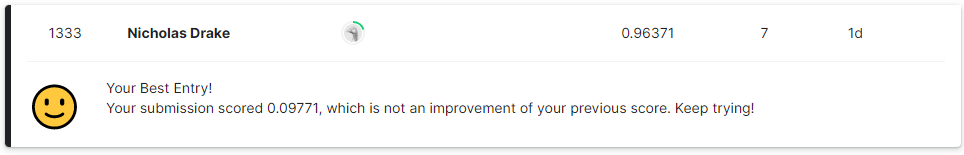

# Assignment 7: Digit Recognizer (Continued)

In [9]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## EDA

In [17]:
x = train_df.drop('label', axis=1)
y = train_df['label']

# Normalize Data
x_s = x/255

# split data into 80% train & 20% test set
x_train, x_test, y_train, y_test = train_test_split(x_s, y, test_size=0.2, 
                                                    random_state=0)

In [18]:
x_train = x_train.values.reshape(33600, 784)
x_test =  x_test.values.reshape(8400, 784)

In [19]:
print(x_test.shape)

(8400, 784)


In [20]:
# count the number of unique train/test set labels
for set in [y_train, y_test]:
  unique, counts = np.unique(set, return_counts=True)
  print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 3319, 1: 3723, 2: 3317, 3: 3488, 4: 3245, 5: 3039, 6: 3296, 7: 3502, 8: 3295, 9: 3376}
Train labels:  {0: 813, 1: 961, 2: 860, 3: 863, 4: 827, 5: 756, 6: 841, 7: 899, 8: 768, 9: 812}


In [21]:
# Convert labels to One Hot Encoded (class vector to binary)
num_digits = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_digits)
y_test = keras.utils.np_utils.to_categorical(y_test, num_digits)

In [22]:
print(y_train[1]) # 6
print(y_train[2]) # 4

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Model: Neural Network
For this week’s assignment, we will be using a sequential neural network model from the Keras package. We will test out different layers and nodes with our neural network and compare their run times and accuracy for the test and train data set.

In [23]:
def model_build(node, layers_n):
  '''
  Function allows user to pick the number of layers (either 2 or 5 layers) 
  and the number of nodes to use for the model.
  :return: model
  '''
  if layers_n == 2:
    model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[784,]),
      keras.layers.Dense(node, activation="relu"),
      keras.layers.Dense(node, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
      ])
  elif layers_n == 5:
    model = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[784,]),
      keras.layers.Dense(node, activation="relu"),
      keras.layers.Dense(node, activation="relu"),
      keras.layers.Dense(node, activation="relu"),
      keras.layers.Dense(node, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
      ])
  else:
    print('Select layer of either 2 or 5')
  
  return model

We will be examining a 2X2 crossed designed with {2, 5} layers and {10, 20} nodes. To do this, we will be using a double for loop to loop through our layers/nodes and save our performance stats in a pandas data frame. We will be comparing at how long the model ran and its training/test accuracy score.

In [24]:
df = pd.DataFrame()

for layer in [2, 5]:
  for node in [10, 20]:
    print(layer)
    print(node)

    model = model_build(node, layer)
    
    # Compiler
    model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    # Fit model
    start = datetime.now()
    history = model.fit(x_train, y_train, epochs=20,
                        verbose=2, validation_data=(x_test, y_test))
    end = datetime.now()
    total_time = end-start
    print(f"Total elapsed time = {total_time}")

    # Clean up time for final df
    minutes = divmod(total_time.seconds, 60)
    m_clean = str(minutes[0])
    s_celan = str(minutes[1])
    time_clean= m_clean+':'+s_celan

    # Append model data to final df
    df = df.append({'layers': layer, 
              'node': node,
              'time': time_clean, 
              'train_accuracy': history.history['accuracy'][-1],
              'val_accuracy': history.history['val_accuracy'][-1]
              },
              ignore_index=True)

2
10
Epoch 1/20
1050/1050 - 2s - loss: 1.5921 - accuracy: 0.4824 - val_loss: 0.9649 - val_accuracy: 0.6949 - 2s/epoch - 2ms/step
Epoch 2/20
1050/1050 - 1s - loss: 0.6910 - accuracy: 0.7944 - val_loss: 0.5290 - val_accuracy: 0.8526 - 1s/epoch - 1ms/step
Epoch 3/20
1050/1050 - 1s - loss: 0.4629 - accuracy: 0.8616 - val_loss: 0.4301 - val_accuracy: 0.8780 - 1s/epoch - 1ms/step
Epoch 4/20
1050/1050 - 1s - loss: 0.3888 - accuracy: 0.8847 - val_loss: 0.3786 - val_accuracy: 0.8921 - 1s/epoch - 1ms/step
Epoch 5/20
1050/1050 - 1s - loss: 0.3495 - accuracy: 0.8980 - val_loss: 0.3457 - val_accuracy: 0.9019 - 1s/epoch - 1ms/step
Epoch 6/20
1050/1050 - 1s - loss: 0.3234 - accuracy: 0.9052 - val_loss: 0.3256 - val_accuracy: 0.9092 - 1s/epoch - 1ms/step
Epoch 7/20
1050/1050 - 1s - loss: 0.3051 - accuracy: 0.9107 - val_loss: 0.3128 - val_accuracy: 0.9106 - 1s/epoch - 1ms/step
Epoch 8/20
1050/1050 - 1s - loss: 0.2892 - accuracy: 0.9161 - val_loss: 0.2992 - val_accuracy: 0.9167 - 1s/epoch - 1ms/step
Epo

In [134]:
df

,layers,node,time,train_accuracy,val_accuracy
0,2.0,10.0,0:36,0.932768,0.926429
1,2.0,20.0,0:34,0.954970,0.944762
2,5.0,10.0,0:33,0.931964,0.921310
3,5.0,20.0,0:42,0.964435,0.947500


Looking at the data frame, our highest accuracy model for both the train and test set is the model with 5 layers and 20 nodes. The high accuracy comes at the cost of a higher run time compared to the other models, which in our case is okay as the data set isn’t too large. If we had thousands of more data points, I would suggest running a model with 2 layers and 20 nodes as it has a high accuracy score for both the train and test set and it has a faster run time.

In [33]:
# Set up model for prediction
model_main = keras.models.Sequential([
      keras.layers.Flatten(input_shape=[784,]),
      keras.layers.Dense(20, activation="relu"),
      keras.layers.Dense(20, activation="relu"),
      keras.layers.Dense(20, activation="relu"),
      keras.layers.Dense(20, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
      ])

In [34]:
model_main.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [35]:
model_main.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 20)                15700     
                                                                 
 dense_17 (Dense)            (None, 20)                420       
                                                                 
 dense_18 (Dense)            (None, 20)                420       
                                                                 
 dense_19 (Dense)            (None, 20)                420       
                                                                 
 dense_20 (Dense)            (None, 10)                210       
                                                                 
Total params: 17,170
Trainable params: 17,170
Non-trai

In [36]:
start = datetime.now()
history = model_main.fit(x_train, y_train, epochs=20,
             validation_data=(x_test, y_test))
end = datetime.now()
total_time = end-start
print(f"Total elapsed time = {total_time}")

Epoch 1/20
1050/1050 [==============================] - 3s 2ms/step - loss: 1.3277 - accuracy: 0.5803 - val_loss: 0.6485 - val_accuracy: 0.7762
Epoch 2/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.5009 - accuracy: 0.8435 - val_loss: 0.4314 - val_accuracy: 0.8785
Epoch 3/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3882 - accuracy: 0.8827 - val_loss: 0.3720 - val_accuracy: 0.8913
Epoch 4/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3223 - accuracy: 0.9048 - val_loss: 0.3079 - val_accuracy: 0.9146
Epoch 5/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2755 - accuracy: 0.9195 - val_loss: 0.2633 - val_accuracy: 0.9261
Epoch 6/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2454 - accuracy: 0.9260 - val_loss: 0.2490 - val_accuracy: 0.9304
Epoch 7/20
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2256 - accuracy: 0.9319 - val_loss: 0.2369 - val_accuracy:

In [37]:
minutes = divmod(total_time.seconds, 60)
m_clean = str(minutes[0])
s_celan = str(minutes[1])
time_clean= m_clean+':'+s_celan

# DQ Check

df_check = pd.DataFrame()
df_check.append({'layers': 5, 
           'node': 20, 
           'time': time_clean, 
           'train_accuracy': history.history['accuracy'][-1],
          'val_accuracy': history.history['val_accuracy'][-1]
           },
          ignore_index=True)

,layers,node,time,train_accuracy,val_accuracy
0,5.0,20.0,0:40,0.96253,0.946786


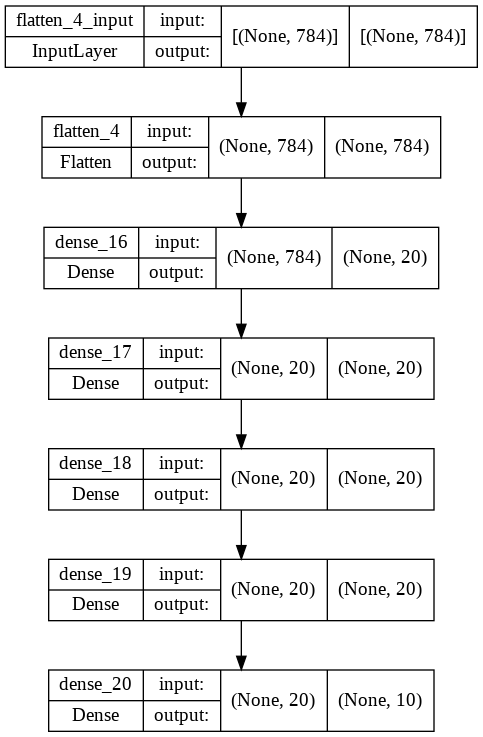

In [38]:
# plotting model
plot_model(model_main, to_file=f'model_viz.png', show_shapes=True, show_layer_names=True)

### Prediction Export

In [150]:
holdout_df4 = test_df

# Standardize the data
ss_holdout = holdout_df4/255

# predict ImageId
n_predict =  pd.DataFrame(model_main.predict(ss_holdout))
n_predict = pd.DataFrame(n_predict.idxmax(axis = 1))
n_predict.index.name = 'ImageId'
n_predict = n_predict.rename(columns = {0: 'Label'}).reset_index()
n_predict['ImageId'] = n_predict['ImageId'] + 1


n_predict.head()

#export to csv
n_predict.to_csv('./drive/MyDrive/Colab Notebooks/Digit_Recognizer/Keras_submission.csv', index=False)

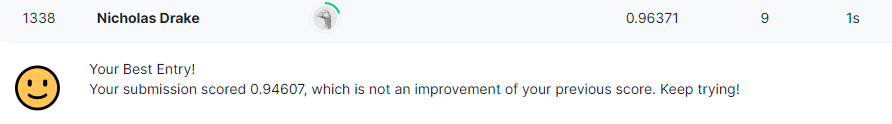